In [1]:
print('Loading modules....')

import os, sys


import uproot
import numpy as np
import matplotlib.pyplot as plt
from qetpy.utils import lowpassfilter 
from qetpy import autocuts
import cdms
#from CDMSDataCatalog import CDMSDataCatalog
import scipy.optimize as optimize
import matplotlib as mpl
import pickle as pkl
import ROOT as rt
import seaborn as sns
import operator as op
import pandas as pd
from collections import Counter

print('modules loaded...')

Loading modules....


<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 80 from C header, got 96 from PyObject
/usr/local/lib/python3.8/dist-packages/CDMSDataCatalog/CDMSDataCatalog.py:6: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources
/usr/local/lib/python3.8/dist-packages/pkg_resources/__init__.py:2868: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('mpl_toolkits')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.8/dist-packages/pkg_resources/__init__.py:2868: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('sphinxcontrib')`.
Implementing implicit namespace packages (as specified in 

Welcome to JupyROOT 6.24/06
modules loaded...


In [2]:
dataset = 'v2.1.1'
detNum = 1

In [3]:
prod='CUTE_T3_GeActivation_%s_V05-00_P0.2.'%(dataset)
base = '/fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R37/Processed/Tests/%s/Submerged'%(prod)

if(dataset == 'prompt'):
    base = '/fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R37/Processed/Prompt/Prompt_V04-15_P0.2.1/Submerged'
    prod = 'Prompt_V04-15_P0.2.1'


# if(dataset == 'v2.1.1'):
#     base = '/sdf/home/y/yanliu/data/cute'
#     prod='CUTE_T3_GeActivation_%s_V05-00_P0.2'%(dataset)

#file_prefix = 'CUTE_T3_GeActivation_v1.0.0_V05-00_P0.2.'

file_prefix = prod
# if(dataset == 'prompt'):
#     base = '/fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R37/Processed/Prompt/Prompt_V04-15_P0.2.1/Submerged'
#     file_prefix = 'Prompt_V04-15_P0.2.1'


# series = ['23231221_015705','23231220_190923','23231220_122140','23231220_053358','23231220_012745',
#          '23231219_184002','23231219_110331','23231219_034952','23231218_223530','23231218_190035',
#          '23231218_152721','23231218_093255','23231217_212512','23231217_171613','23231217_135018']


#Found series in reprocessed data
# series = ['23231220_012745', '23231219_184002', '23231219_110331', '23231219_034952', 
#           '23231218_223530', '23231218_190035', '23231218_152721', '23231217_212512']

#Only 4 series
series = ['23231219_034952','23231219_110331','23231218_223530','23231217_212512']

# 11 data series
# series = [
#     '23231220_012745','23231219_184002','23231219_110331','23231219_034952','23231218_223530',
#     '23231218_190035','23231218_152721','23231218_093255','23231217_212512','23231217_171613',
#     '23231217_135018'
#          ]

# 20 data series
# series = [
#     '23231216_013604', '23231216_043946', '23231216_100125', '23231216_115012', '23231216_145300',
#     '23231216_182937', '23231216_194929', '23231216_211119', '23231216_233807', '23231217_135018',
#     '23231217_171613', '23231217_212512', '23231218_093255', '23231218_152721', '23231218_190035',
#     '23231218_223530', '23231219_034952', '23231219_110331', '23231219_184002', '23231220_012745'
# ]

filePath = []
found_series = []
for ser in series:
    
    fp = '%s/%s_%s.root'%(base,file_prefix,ser)
    if(os.path.exists(fp)):
        print(ser,' : ',fp)
        filePath.append(fp)
        found_series.append(ser)
    else:
        print('not found: ',fp)
series = found_series
print('Found series = ',series)
print('Number of found series = ',len(series))


23231219_034952  :  /fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R37/Processed/Tests/CUTE_T3_GeActivation_v2.1.1_V05-00_P0.2./Submerged/CUTE_T3_GeActivation_v2.1.1_V05-00_P0.2._23231219_034952.root
23231219_110331  :  /fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R37/Processed/Tests/CUTE_T3_GeActivation_v2.1.1_V05-00_P0.2./Submerged/CUTE_T3_GeActivation_v2.1.1_V05-00_P0.2._23231219_110331.root
23231218_223530  :  /fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R37/Processed/Tests/CUTE_T3_GeActivation_v2.1.1_V05-00_P0.2./Submerged/CUTE_T3_GeActivation_v2.1.1_V05-00_P0.2._23231218_223530.root
23231217_212512  :  /fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R37/Processed/Tests/CUTE_T3_GeActivation_v2.1.1_V05-00_P0.2./Submerged/CUTE_T3_GeActivation_v2.1.1_V05-00_P0.2._23231217_212512.root
Found series =  ['23231219_034952', '23231219_110331', '23231218_223530', '23231217_212512']
Number of found series =  4


In [4]:
print('Loading RQ and Event Tree...')
RQ=[]
for i,ser in enumerate(series):
    RQ.append(uproot.open(filePath[i])['rqDir/zip%d'%(detNum)]) 

eventTree=[]
for i,ser in enumerate(series):
    eventTree.append(uproot.open(filePath[i])['rqDir/eventTree']) 

print('done..')


print('Loading OF spefic data....')
#Load RQs from processed files
channels=['PT','PAS1','PBS1','PCS1','PDS1','PES1','PFS1','PAS2','PBS2','PCS2','PDS2','PES2','PFS2']

OFchiq={}
OFamps={}
OFdelay={}
OFamps0={}
OFnorms={}
OFbs={}

for i,key in enumerate(series):
    tc={}
    ta={}
    td={}
    ta0={}
    tn = {}
    tbs = {}
    for c in channels:
        if(detNum == '3' and c == 'PAS1'):
            print('\tSkipping Z3-PAS1...')
            continue
        tc[c]=(RQ[i][c+"OFchisq"].array(library='np'))
        ta[c]=(RQ[i][c+"OFamps"].array(library='np'))
        ta0[c]=(RQ[i][c+"OFamps0"].array(library='np'))
        td[c]=(RQ[i][c+"OFdelay"].array(library='np'))
        
        # tc[c]=(RQ[i].array(c+"OFchisq"))
        # ta[c]=(RQ[i].array(c+"OFamps"))
        # ta0[c]=(RQ[i].array(c+"OFamps0"))
        # td[c]=(RQ[i].array(c+"OFdelay"))
        if(c!='PT'):
            tn[c] = (RQ[i][c+"norm"].array(library='np'))
            tbs[c] = (RQ[i][c+"bs"].array(library='np'))
            # tn[c] = (RQ[i].array(c+"norm"))
            # tbs[c] = (RQ[i].array(c+"bs"))
            
    OFchiq[key]=tc
    OFamps[key]=ta
    OFamps0[key]=ta0
    OFdelay[key]=td
    OFnorms[key]=tn
    OFbs[key]=tbs
    print('%s loaded'%(key))
    
print('done!')

print(' Loading Event specific data....')


TriggerTime=[]
TriggerType=[]
EventNumber=[]
TrigDet=[]
TriggerMask=[]
EventTime=[]

R2 = {} # Radial parameter for S2
R1 = {} # Radial parameter for S1
amp_diff = {}  
amp_diff_abs = {}
for i,key in enumerate(series):
    TriggerTime.append(eventTree[i]["TriggerTime"].array())
    TriggerType.append(eventTree[i]["TriggerType"].array())
    EventNumber.append(eventTree[i]["EventNumber"].array())
    TrigDet.append(eventTree[i]["TriggerDetectorNum"].array())
    TriggerMask.append(eventTree[i]["TriggerMask"].array())
    EventTime.append(eventTree[i]["EventTime"].array())
    
    # TriggerTime.append(eventTree[i].array("TriggerTime"))
    # TriggerType.append(eventTree[i].array("TriggerType"))
    # EventNumber.append(eventTree[i].array("EventNumber"))
    # TrigDet.append(eventTree[i].array("TriggerDetectorNum"))
    # TriggerMask.append(eventTree[i].array("TriggerMask"))
    # EventTime.append(eventTree[i].array("EventTime"))
    R2[key] = OFdelay[key]['PFS2'] - OFdelay[key]['PAS2']
    R1[key] = OFdelay[key]['PFS1'] - OFdelay[key]['PAS1']
    amp_diff[key] = (OFamps[key]['PFS2'] - OFamps[key]['PAS2'])/(OFamps[key]['PFS2'] + OFamps[key]['PAS2'])
    amp_diff_abs[key] = (OFamps[key]['PFS2'] - OFamps[key]['PAS2'])
    print('%s loaded'%(key))

print('Done!')

Loading RQ and Event Tree...
done..
Loading OF spefic data....
23231219_034952 loaded
23231219_110331 loaded
23231218_223530 loaded
23231217_212512 loaded
done!
 Loading Event specific data....
23231219_034952 loaded
23231219_110331 loaded
23231218_223530 loaded
23231217_212512 loaded
Done!


In [10]:

factors = [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]
calib_chans = ["PFS1", "PCS1", "PDS1", "PBS1", "PES1", "PAS1", "PFS2", "PCS2", "PBS2", "PES2", "PDS2", "PAS2"]
#calib_chans = ['PAS1','PBS1','PCS1','PDS1','PES1','PFS1','PAS2','PBS2','PCS2','PDS2','PES2','PFS2']
#factors = []

calib = {}
for i,c in enumerate(calib_chans):
    calib[c] = factors[i]
reweight = 1.0


#### New calibrations ####
# a1 = 1.2506
# b1 = 0.9620
# c1 = 0.8658
# d1 = 0.9620
# e1 = 0.9620
# f1 = 0.9620

# a2 = 1.1799
# b2 = 0.9983
# c2 = 0.7714
# d2 = 1.0437
# e2 = 1.0891
# f2 = 0.9530
# reweight = 1.0
########################

										
#### new calib normalized ####
if(dataset == 'v2.1.1'): 
    #### old calib normalized ####
    # calib['PAS1'] = 1.2506 
    # calib['PBS1'] = 0.9620
    # calib['PCS1'] = 0.8658
    # calib['PDS1'] = 0.9620
    # calib['PES1'] = 0.9620
    # calib['PFS1'] = 0.9620
    # calib['PAS2'] = 1.1799
    # calib['PBS2'] = 0.9983
    # calib['PCS2'] = 0.7714
    # calib['PDS2'] = 1.0437
    # calib['PES2'] = 1.0891
    # calib['PFS2'] = 0.9530
    # reweight = 1.0

    # #### new calib ####
    # calib['PAS1'] = 1.2506 * 0.85
    # calib['PBS1'] = 0.9620 * 1.0
    # calib['PCS1'] = 0.8658 * 1.0
    # calib['PDS1'] = 0.9620 * 1.0
    # calib['PES1'] = 0.9620 * 0.9
    # calib['PFS1'] = 0.9620 * 0.85
    # calib['PAS2'] = 1.1799 * 1.0
    # calib['PBS2'] = 0.9983 * 1.0
    # calib['PCS2'] = 0.7714 * 1.0
    # calib['PDS2'] = 1.0437 * 1.0
    # calib['PES2'] = 1.0891 * 1.0
    # calib['PFS2'] = 0.9530 * 1.0
    # reweight = 1.0 * 1.1

    # #### new calib normalized ####
    calib['PAS1'] = 1.1572
    calib['PBS1'] = 1.0473
    calib['PCS1'] = 0.9425
    calib['PDS1'] = 1.0473
    calib['PES1'] = 0.9425
    calib['PFS1'] = 0.8902
    calib['PAS2'] = 1.1677
    calib['PBS2'] = 0.9880
    calib['PCS2'] = 0.7634
    calib['PDS2'] = 1.0329
    calib['PES2'] = 1.0778
    calib['PFS2'] = 0.9431
    reweight = 1.0
    
elif(dataset == 'v2.1.0'):
    calib['PAS1'] = 1.4779 
    calib['PBS1'] = 0.9182
    calib['PCS1'] = 0.8745
    calib['PDS1'] = 1.0057
    calib['PES1'] = 0.8308
    calib['PFS1'] = 0.6996
    calib['PAS2'] = 1.3755
    calib['PBS2'] = 1.0321
    calib['PCS2'] = 0.7297
    calib['PDS2'] = 1.2756
    calib['PES2'] = 1.0508
    calib['PFS2'] = 0.7297
    reweight = 1.0    

In [11]:
#filename = ''
#filename = 'prompt_%s_Z%d_4ser.root'%(dataset,detNum)
filename = 'reproc_%s_Z%d_4ser_triangle_calib.root'%(dataset,detNum)
if(filename == ''):
    filename = 'reproc_%s_Z%d.root'%(dataset,detNum)
outfile = rt.TFile.Open(filename,'recreate')
outfile.cd()


def deg(angle):
    return angle*(np.pi/180)


print('Calculating triangles......')
CDE_S1_X = {}
CDE_S1_Y = {}
CDE_S2_X = {}
CDE_S2_Y = {}
CDE_S1_X_corr = {}
CDE_S1_Y_corr = {}
CDE_S2_X_corr = {}
CDE_S2_Y_corr = {}

BDF_S1_X = {}
BDF_S1_Y = {}
BDF_S2_X = {}
BDF_S2_Y = {}
BDF_S1_X_corr = {}
BDF_S1_Y_corr = {}
BDF_S2_X_corr = {}
BDF_S2_Y_corr = {}

ADF_S1_X = {}
ADF_S1_Y = {}
ADF_S2_X = {}
ADF_S2_Y = {}
ADF_S1_X_corr = {}
ADF_S1_Y_corr = {}
ADF_S2_X_corr = {}
ADF_S2_Y_corr = {}

asym_par = {}
asym_par_corr = {}



# ----after normalization-----

# a1 = 1.2506
# b1 = 0.9620
# c1 = 0.8658
# d1 = 0.9620
# e1 = 0.9620
# f1 = 0.9620
# a2 = 1.1799
# b2 = 0.9983
# c2 = 0.7714
# d2 = 1.0437
# e2 = 1.0891
# f2 = 0.9530
# reweight = 1.0
# ------------





for idx, key in enumerate(series):
    A1_def = OFamps[key]['PAS1']
    B1_def = OFamps[key]['PBS1']
    C1_def = OFamps[key]['PCS1']
    D1_def = OFamps[key]['PDS1']
    E1_def = OFamps[key]['PES1']
    F1_def = OFamps[key]['PFS1']

    A2_def = OFamps[key]['PAS2']
    B2_def = OFamps[key]['PBS2']
    C2_def = OFamps[key]['PCS2']
    D2_def = OFamps[key]['PDS2']
    E2_def = OFamps[key]['PES2']
    F2_def = OFamps[key]['PFS2']
    
    A1 = calib['PAS1'] * A1_def
    B1 = calib['PBS1'] * B1_def
    C1 = calib['PCS1'] * C1_def
    D1 = calib['PDS1'] * D1_def
    E1 = calib['PES1'] * E1_def
    F1 = calib['PFS1'] * F1_def
    
    A2 = calib['PAS2'] * A2_def
    B2 = calib['PBS2'] * B2_def
    C2 = calib['PCS2'] * C2_def
    D2 = calib['PDS2'] * D2_def
    E2 = calib['PES2'] * E2_def
    F2 = calib['PFS2'] * F2_def
    
    bdf_s1_x = (F1_def*np.cos(deg(0)) + B1_def*np.cos(deg(120)) + D1_def*np.cos(deg(240)))/(F1_def+B1_def+D1_def)
    bdf_s1_y = (F1_def*np.sin(deg(0)) + B1_def*np.sin(deg(120)) + D1_def*np.sin(deg(240)))/(F1_def+B1_def+D1_def)
    bdf_s2_x = (B2_def*np.cos(deg(0+60)) + F2_def*np.cos(deg(120+60)) + D2_def*np.cos(deg(240+60)))/(F2_def+B2_def+D2_def)
    bdf_s2_y = (B2_def*np.sin(deg(0+60)) + F2_def*np.sin(deg(120+60)) + D2_def*np.sin(deg(240+60)))/(F2_def+B2_def+D2_def)
    BDF_S1_X[key] = np.array(bdf_s1_x)
    BDF_S1_Y[key] = np.array(bdf_s1_y)
    BDF_S2_X[key] = np.array(bdf_s2_x)
    BDF_S2_Y[key] = np.array(bdf_s2_y)

    bdf_s1_x = (F1*np.cos(deg(0)) + B1*np.cos(deg(120)) + D1*np.cos(deg(240)))/(F1+B1+D1)
    bdf_s1_y = (F1*np.sin(deg(0)) + B1*np.sin(deg(120)) + D1*np.sin(deg(240)))/(F1+B1+D1)
    bdf_s2_x = (B2*np.cos(deg(0+60)) + F2*np.cos(deg(120+60)) + D2*np.cos(deg(240+60)))/(F2+B2+D2)
    bdf_s2_y = (B2*np.sin(deg(0+60)) + F2*np.sin(deg(120+60)) + D2*np.sin(deg(240+60)))/(F2+B2+D2)
    BDF_S1_X_corr[key] = np.array(bdf_s1_x)
    BDF_S1_Y_corr[key] = np.array(bdf_s1_y)
    BDF_S2_X_corr[key] = np.array(bdf_s2_x)
    BDF_S2_Y_corr[key] = np.array(bdf_s2_y)
    
    
    cde_s1_x = (E1_def*np.cos(deg(0)) + C1_def*np.cos(deg(120)) + D1_def*np.cos(deg(240)))/(E1_def+C1_def+D1_def)
    cde_s1_y = (E1_def*np.sin(deg(0)) + C1_def*np.sin(deg(120)) + D1_def*np.sin(deg(240)))/(E1_def+C1_def+D1_def)
    cde_s2_x = (C2_def*np.cos(deg(0+60)) + E2_def*np.cos(deg(120+60)) + D2_def*np.cos(deg(240+60)))/(E2_def+C2_def+D2_def)
    cde_s2_y = (C2_def*np.sin(deg(0+60)) + E2_def*np.sin(deg(120+60)) + D2_def*np.sin(deg(240+60)))/(E2_def+C2_def+D2_def)
    CDE_S1_X[key] = np.array(cde_s1_x)
    CDE_S1_Y[key] = np.array(cde_s1_y)
    CDE_S2_X[key] = np.array(cde_s2_x)
    CDE_S2_Y[key] = np.array(cde_s2_y)

    cde_s1_x = (E1*np.cos(deg(0)) + C1*np.cos(deg(120)) + D1*np.cos(deg(240)))/(E1+C1+D1)
    cde_s1_y = (E1*np.sin(deg(0)) + C1*np.sin(deg(120)) + D1*np.sin(deg(240)))/(E1+C1+D1)
    cde_s2_x = (C2*np.cos(deg(0+60)) + E2*np.cos(deg(120+60)) + D2*np.cos(deg(240+60)))/(E2+C2+D2)
    cde_s2_y = (C2*np.sin(deg(0+60)) + E2*np.sin(deg(120+60)) + D2*np.sin(deg(240+60)))/(E2+C2+D2)
    CDE_S1_X_corr[key] = np.array(cde_s1_x)
    CDE_S1_Y_corr[key] = np.array(cde_s1_y)
    CDE_S2_X_corr[key] = np.array(cde_s2_x)
    CDE_S2_Y_corr[key] = np.array(cde_s2_y)
    
    adf_s1_x = (F1_def*np.cos(deg(0)) + A1_def*np.cos(deg(120)) + D1_def*np.cos(deg(240)))/(F1_def+A1_def+D1_def)
    adf_s1_y = (F1_def*np.sin(deg(0)) + A1_def*np.sin(deg(120)) + D1_def*np.sin(deg(240)))/(F1_def+A1_def+D1_def)
    adf_s2_x = (A2_def*np.cos(deg(0+60)) + F2_def*np.cos(deg(120+60)) + D2_def*np.cos(deg(240+60)))/(F2_def+A2_def+D2_def)
    adf_s2_y = (A2_def*np.sin(deg(0+60)) + F2_def*np.sin(deg(120+60)) + D2_def*np.sin(deg(240+60)))/(F2_def+A2_def+D2_def)
    ADF_S1_X[key] = np.array(adf_s1_x)
    ADF_S1_Y[key] = np.array(adf_s1_y)
    ADF_S2_X[key] = np.array(adf_s2_x)
    ADF_S2_Y[key] = np.array(adf_s2_y)

    adf_s1_x = (F1*np.cos(deg(0)) + A1*np.cos(deg(120)) + D1*np.cos(deg(240)))/(F1+A1+D1)
    adf_s1_y = (F1*np.sin(deg(0)) + A1*np.sin(deg(120)) + D1*np.sin(deg(240)))/(F1+A1+D1)
    adf_s2_x = (A2*np.cos(deg(0+60)) + F2*np.cos(deg(120+60)) + D2*np.cos(deg(240+60)))/(F2+A2+D2)
    adf_s2_y = (A2*np.sin(deg(0+60)) + F2*np.sin(deg(120+60)) + D2*np.sin(deg(240+60)))/(F2+A2+D2)
    ADF_S1_X_corr[key] = np.array(adf_s1_x)
    ADF_S1_Y_corr[key] = np.array(adf_s1_y)
    ADF_S2_X_corr[key] = np.array(adf_s2_x)
    ADF_S2_Y_corr[key] = np.array(adf_s2_y)
    
    s1 = A1_def + B1_def + C1_def + D1_def + E1_def + F1_def
    s2 = A2_def + B2_def + C2_def + D2_def + E2_def + F2_def
    asym_par[key] = (s1 - s2)/(s1 + s2)
    s1 = A1 + B1 + C1 + D1 + E1 + F1
    s1 = s1*reweight
    s2 = A2 + B2 + C2 + D2 + E2 + F2
    
    asym_par_corr[key] = (s1 - s2)/(s1 + s2)
    
    print('%s done'%(key))
    
    
def make_graph(x,y,name):
    temp = rt.TGraph(len(x),x,y)
    temp.SetName(name)
    return(temp)

def make_hist(y,name):
    temp_hist = rt.TH1F(name,name,200,-0.3,0.3)
    for i in range(len(y)):
        temp_hist.Fill(y[i])
    return temp_hist


def compute_triangle(X,Y,low,high):
    x = np.array([])
    y = np.array([])
    chan = 'PT'
    for idx, key in enumerate(series):
        #mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 25e-6) & (OFamps[key][chan] < 32e-6) & (OFchiq[key][chan] < 5e5)
        mask = (TriggerType[idx] == 1) & (TrigDet[idx] == detNum) & (OFamps[key][chan] > low) & (OFamps[key][chan] < high) & (OFchiq[key][chan] < 5e5) & (abs(OFdelay[key][chan])*1e3 < 20)        
        x = np.append(x,X[key][mask])
        y = np.append(y,Y[key][mask])
    return(x,y)


def compute_Z(Y,low,high):
    x = np.array([])
    y = np.array([])
    chan = 'PT'
    for idx, key in enumerate(series):
        #mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 25e-6) & (OFamps[key][chan] < 32e-6) & (OFchiq[key][chan] < 5e5)
        mask = (TriggerType[idx] == 1) & (TrigDet[idx] == detNum) & (OFamps[key][chan] > low) & (OFamps[key][chan] < high) & (OFchiq[key][chan] < 5e5) & (abs(OFdelay[key][chan])*1e3 < 20)
        x = np.append(x,OFamps[key][chan][mask])
        y = np.append(y,Y[key][mask])
    return(x,y)



graphs = []
hists = []
'''
 Make CDE graph
'''

x,y = compute_triangle(CDE_S1_X,CDE_S1_Y,3e-6,4.2e-6)
graphs.append(make_graph(x,y,'CDE_S1_1kev'))

x,y = compute_triangle(CDE_S2_X,CDE_S2_Y,3e-6,4.2e-6)
graphs.append(make_graph(x,y,'CDE_S2_1kev'))

x,y = compute_triangle(CDE_S1_X_corr,CDE_S1_Y_corr,3e-6,4.2e-6)
graphs.append(make_graph(x,y,'CDE_S1_1kev_corr'))

x,y = compute_triangle(CDE_S2_X_corr,CDE_S2_Y_corr,3e-6,4.2e-6)
graphs.append(make_graph(x,y,'CDE_S2_1kev_corr'))


x,y = compute_triangle(CDE_S1_X,CDE_S1_Y,25e-6, 32e-6)
graphs.append(make_graph(x,y,'CDE_S1_10kev'))

x,y = compute_triangle(CDE_S2_X,CDE_S2_Y,25e-6, 32e-6)
graphs.append(make_graph(x,y,'CDE_S2_10kev'))

x,y = compute_triangle(CDE_S1_X_corr,CDE_S1_Y_corr,25e-6, 32e-6)
graphs.append(make_graph(x,y,'CDE_S1_10kev_corr'))

x,y = compute_triangle(CDE_S2_X_corr,CDE_S2_Y_corr,25e-6, 32e-6)
graphs.append(make_graph(x,y,'CDE_S2_10kev_corr'))

print('CDE graphs computed....')
'''
 Make BDF graph
'''

x,y = compute_triangle(BDF_S1_X,BDF_S1_Y,3e-6,4.2e-6)
graphs.append(make_graph(x,y,'BDF_S1_1kev'))

x,y = compute_triangle(BDF_S2_X,BDF_S2_Y,3e-6,4.2e-6)
graphs.append(make_graph(x,y,'BDF_S2_1kev'))

x,y = compute_triangle(BDF_S1_X_corr,BDF_S1_Y_corr,3e-6,4.2e-6)
graphs.append(make_graph(x,y,'BDF_S1_1kev_corr'))

x,y = compute_triangle(BDF_S2_X_corr,BDF_S2_Y_corr,3e-6,4.2e-6)
graphs.append(make_graph(x,y,'BDF_S2_1kev_corr'))


x,y = compute_triangle(BDF_S1_X,BDF_S1_Y,25e-6, 32e-6)
graphs.append(make_graph(x,y,'BDF_S1_10kev'))

x,y = compute_triangle(BDF_S2_X,BDF_S2_Y,25e-6, 32e-6)
graphs.append(make_graph(x,y,'BDF_S2_10kev'))

x,y = compute_triangle(BDF_S1_X_corr,BDF_S1_Y_corr,25e-6, 32e-6)
graphs.append(make_graph(x,y,'BDF_S1_10kev_corr'))

x,y = compute_triangle(BDF_S2_X_corr,BDF_S2_Y_corr,25e-6, 32e-6)
graphs.append(make_graph(x,y,'BDF_S2_10kev_corr'))

print('BDF graphs computed....')


'''
 Make ADF graph
'''

x,y = compute_triangle(ADF_S1_X,ADF_S1_Y,3e-6,4.2e-6)
graphs.append(make_graph(x,y,'ADF_S1_1kev'))

x,y = compute_triangle(ADF_S2_X,ADF_S2_Y,3e-6,4.2e-6)
graphs.append(make_graph(x,y,'ADF_S2_1kev'))

x,y = compute_triangle(ADF_S1_X_corr,ADF_S1_Y_corr,3e-6,4.2e-6)
graphs.append(make_graph(x,y,'ADF_S1_1kev_corr'))

x,y = compute_triangle(ADF_S2_X_corr,ADF_S2_Y_corr,3e-6,4.2e-6)
graphs.append(make_graph(x,y,'ADF_S2_1kev_corr'))


x,y = compute_triangle(ADF_S1_X,ADF_S1_Y,25e-6, 32e-6)
graphs.append(make_graph(x,y,'ADF_S1_10kev'))

x,y = compute_triangle(ADF_S2_X,ADF_S2_Y,25e-6, 32e-6)
graphs.append(make_graph(x,y,'ADF_S2_10kev'))

x,y = compute_triangle(ADF_S1_X_corr,ADF_S1_Y_corr,25e-6, 32e-6)
graphs.append(make_graph(x,y,'ADF_S1_10kev_corr'))

x,y = compute_triangle(ADF_S2_X_corr,ADF_S2_Y_corr,25e-6, 32e-6)
graphs.append(make_graph(x,y,'ADF_S2_10kev_corr'))

print('ADF graphs computed....')


x,y=compute_Z(asym_par,3e-6, 4.2e-6)
graphs.append(make_graph(x,y,'Z_1kev')) 
hists.append(make_hist(y,'h_Z_1kev'))

x,y=compute_Z(asym_par_corr, 3e-6, 4.2e-6)
graphs.append(make_graph(x,y,'Z_1kev_corr')) 
hists.append(make_hist(y,'h_Z_1kev_corr'))

x,y=compute_Z(asym_par,25e-6, 32e-6)
graphs.append(make_graph(x,y,'Z_10kev')) 
hists.append(make_hist(y,'h_Z_10kev'))

x,y=compute_Z(asym_par_corr, 25e-6, 32e-6)
graphs.append(make_graph(x,y,'Z_10kev_corr'))
hists.append(make_hist(y,'h_Z_10kev_corr'))

x,y=compute_Z(asym_par,0.4e-6, 40e-6)
graphs.append(make_graph(x,y,'Z_all')) 
hists.append(make_hist(y,'h_Z_all'))

x,y=compute_Z(asym_par_corr, 0.4e-6, 40e-6)
graphs.append(make_graph(x,y,'Z_all_corr'))
hists.append(make_hist(y,'h_Z_all_corr'))


x = np.array([])
y = np.array([])
chan = 'PT'
for idx, key in enumerate(series):
    mask = (TriggerType[idx] == 1) & (TrigDet[idx] == detNum) & (OFamps[key][chan] > 0)# & (OFchiq[key][chan] < 5e5)
    x = np.append(x,OFamps[key][chan][mask])
    y = np.append(y,OFchiq[key][chan][mask])

h_chiq_PTOF = rt.TH2F('h_chiq_PTOF','h_chiq_PTOF',100,-8, -4,100,np.logspace(4.3, 9, 101)) 
h_chiq_PTOF.GetXaxis().SetTitle('PTOFamps [uA]')
h_chiq_PTOF.GetYaxis().SetTitle('Chiq')
h_chiq_PTOF.SetStats(0)
for i in range(len(x)):
    h_chiq_PTOF.Fill(np.log10(x[i]),y[i])
    


# chan = 'PT'
# x = np.array([])
# y = np.array([])
# temp = asym_par
# h_z_1kev = rt.TH1F('h_z_1kev','h_z_1kev',200,-0.3,0.3)
# for idx,key in enumerate(series):
#     mask = (TriggerType[idx] == 1) & (TrigDet[idx] == detNum) & (OFamps[key][chan] > 3e-6) & (OFamps[key][chan] < 4.2e-6) & (OFchiq[key][chan] < 5e5)
#     x = np.append(x,temp[key][mask])
#     for i in range(len(x)):
#         h_z_1kev.Fill(x[i])


# chan = 'PT'
# x = np.array([])
# y = np.array([])
# temp = asym_par
# h_z_10kev = rt.TH1F('h_z_10kev','h_z_10kev',200,-0.3,0.3)
# for idx,key in enumerate(series):
#     mask = (TriggerType[idx] == 1) & (TrigDet[idx] == detNum) & (OFamps[key][chan] > 25e-6) & (OFamps[key][chan] < 32e-6) & (OFchiq[key][chan] < 5e5)
#     x = np.append(x,temp[key][mask])
#     for i in range(len(x)):
#         h_z_10kev.Fill(x[i])
        
# chan = 'PT'
# x = np.array([])
# y = np.array([])
# temp = asym_par
# h_z_all = rt.TH1F('h_z_all','h_z_all',200,-0.3,0.3)
# for idx,key in enumerate(series):
#     mask = (TriggerType[idx] == 1) & (TrigDet[idx] == detNum) & (OFamps[key][chan] > 0.4e-6)  & (OFchiq[key][chan] < 5e5)
#     x = np.append(x,temp[key][mask])
#     for i in range(len(x)):
#         h_z_all.Fill(x[i])
        
# chan = 'PT'
# x = np.array([])
# y = np.array([])
# temp = asym_par_corr
# h_z_all_corr = rt.TH1F('h_z_all_corr','h_z_all_corr',200,-0.3,0.3)
# for idx,key in enumerate(series):
#     mask = (TriggerType[idx] == 1) & (TrigDet[idx] == detNum) & (OFamps[key][chan] > 0.4e-6)  & (OFchiq[key][chan] < 5e5)
#     x = np.append(x,temp[key][mask])
#     for i in range(len(x)):
#         h_z_all_corr.Fill(x[i])


for g in graphs:
    g.Write()
    
# for h in hists:
#     h.Write()
    
    
    
# h_z_1kev.Write()
# h_z_10kev.Write()
# h_z_all.Write()
# h_z_all_corr.Write()
outfile.Write()
outfile.Close()
print('%s file written..'%(filename))
print('----- All done ----')

Calculating triangles......
23231219_034952 done
23231219_110331 done
23231218_223530 done
23231217_212512 done
CDE graphs computed....
BDF graphs computed....
ADF graphs computed....
reproc_v2.1.1_Z1_4ser_triangle_calib.root file written..
----- All done ----


In [11]:
idx = 1
key  = series[idx]
#3e-6, 4.2e-6
chan = 'PT'
mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 3e-6) & (OFamps[key][chan] < 4.2e-6) & (OFchiq[key][chan] < 5e5)
print(key)
print(EventNumber[idx][mask].astype(int).tolist())


23231219_184002
[42499, 110523, 200199, 203569, 203576, 263548, 322159, 333501, 340031, 340043, 390327, 410922, 412030, 413329, 483285, 483580, 540544, 552406, 552412, 583075, 622828, 641002, 680447, 690454, 702352, 712500, 750375, 750379, 762799, 780909, 781632]


## Obtain final values for calibration

In [44]:
### original ###

calib_official = {
    'PAS1' : 1.1849,
    'PBS1' : 0.9570,
    'PCS1' : 0.9115,
    'PDS1' : 1.0482,
    'PES1' : 0.8659,
    'PFS1' : 0.7292,
    'PAS2' : 1.2351,
    'PBS2' : 1.0477,
    'PCS2' : 0.8518,
    'PDS2' : 1.2948,
    'PES2' : 1.0222,
    'PFS2' : 0.8518
}



calib_my = {
    'PAS1' : 1.3,
    'PBS1' : 1.0,
    'PCS1' : 0.9,
    'PDS1' : 1.0,
    'PES1' : 1.0,
    'PFS1' : 1.0,
    'PAS2' : 1.3,
    'PBS2' : 1.10,
    'PCS2' : 0.85,
    'PDS2' : 1.15,
    'PES2' : 1.2,
    'PFS2' : 1.05
}
reweight = 1.06


calib_my['PAS1'] = 1.2506 * 0.85
calib_my['PBS1'] = 0.9620 * 1.0
calib_my['PCS1'] = 0.8658 * 1.0
calib_my['PDS1'] = 0.9620 * 1.0
calib_my['PES1'] = 0.9620 * 0.9
calib_my['PFS1'] = 0.9620 * 0.85
calib_my['PAS2'] = 1.1799 * 1.0
calib_my['PBS2'] = 0.9983 * 1.0
calib_my['PCS2'] = 0.7714 * 1.0
calib_my['PDS2'] = 1.0437 * 1.0
calib_my['PES2'] = 1.0891 * 1.0
calib_my['PFS2'] = 0.9530 * 1.0
reweight = 1.0 * 1.1

channels=['PAS1','PBS1','PCS1','PDS1','PES1','PFS1','PAS2','PBS2','PCS2','PDS2','PES2','PFS2']

calib_final = {}
sum_ = 0.0
for c in channels:
    factor = 1.0
    if('S1' in c):
        factor = reweight
    calib_final[c] =  1.0 * calib_my[c] * factor
    sum_ += calib_final[c]
check = 0.0

print('sum before normalization = ',sum_)
print('normalization factor = ',(12.0/sum_))

for c in channels:
    norm = 12.0/sum_
    check += norm*calib_final[c]
    #print("calib['%s'] = %0.4f"%(c,calib_final[c]*norm))
    name=c[1].lower() + c[3]
    print('%s = %0.4f'%(name,calib_final[c]*norm))
print('after remorm = ',check)

sum before normalization =  12.125340999999999
normalization factor =  0.98966288865608
a1 = 1.1572
b1 = 1.0473
c1 = 0.9425
d1 = 1.0473
e1 = 0.9425
f1 = 0.8902
a2 = 1.1677
b2 = 0.9880
c2 = 0.7634
d2 = 1.0329
e2 = 1.0778
f2 = 0.9431
after remorm =  12.000000000000002


In [11]:
x = np.array([])
y = np.array([])
chan = 'PT'
for idx, key in enumerate(series):
    mask = (TriggerType[idx] == 1) & (TrigDet[idx] == detNum) & (OFamps[key][chan] > 0)# & (OFchiq[key][chan] < 5e5)
    x = np.append(x,OFamps[key][chan][mask])
    y = np.append(y,OFchiq[key][chan][mask])

h_chiq_PTOF = rt.TH2F('h_chiq_PTOF','h_chiq_PTOF',100,-8, -4,100,np.logspace(4.3, 9, 101)) 
h_chiq_PTOF.GetXaxis().SetTitle('PTOFamps [uA]')
h_chiq_PTOF.GetYaxis().SetTitle('Chiq')
h_chiq_PTOF.SetStats(0)
for i in range(len(x)):
    h_chiq_PTOF.Fill(np.log10(x[i]),y[i])

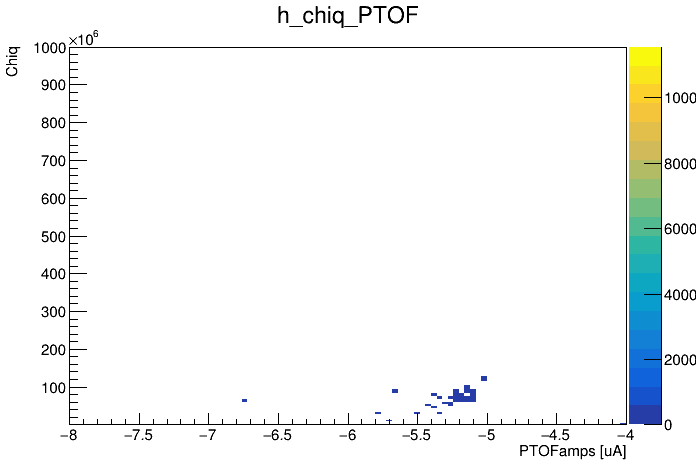

In [12]:
can = rt.TCanvas()
h_chiq_PTOF.Draw('colz')
can.Draw()

In [13]:
x = np.array([])
y = np.array([])
chan = 'PT'
for idx, key in enumerate(series):
    mask = (TriggerType[idx] == 1) & (TrigDet[idx] == detNum) & (OFamps[key][chan] > 0)# & (OFchiq[key][chan] < 5e5)
    x = np.append(x,OFamps[key][chan][mask])
    y = np.append(y,OFchiq[key][chan][mask])


In [11]:
series

[]

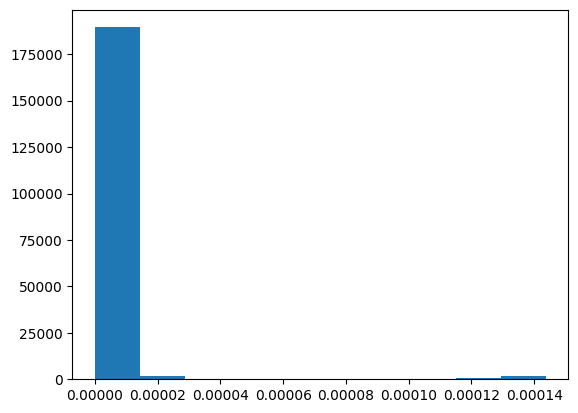

In [14]:
plt.figure()
plt.hist(x)
plt.show()

In [ ]:
cde_s1_x = (E1_def*np.cos(deg(0)) + C1_def*np.cos(deg(120)) + D1_def*np.cos(deg(240)))/(E1_def+C1_def+D1_def)
cde_s1_y = (E1_def*np.sin(deg(0)) + C1_def*np.sin(deg(120)) + D1_def*np.sin(deg(240)))/(E1_def+C1_def+D1_def)


In [14]:
chan_e1 = 0.0
chan_c1 = 0.0
chan_d1 = 1.0
x = (chan_e1*np.cos(deg(0)) + chan_c1*np.cos(deg(120)) + chan_d1*np.cos(deg(240)))/(chan_e1+chan_c1+chan_d1)
y = (chan_e1*np.sin(deg(0)) + chan_c1*np.sin(deg(120)) + chan_d1*np.sin(deg(240)))/(chan_e1+chan_c1+chan_d1)
print('x = ',x)
print('y = ',y)

x =  -0.5000000000000003
y =  -0.8660254037844383
